# ID2214: Programming for Data Science
## Exploratory Data Analysis
### adapted from Amir Hossein A. Rahnama
https://gits-15.sys.kth.se/amiakh/ID2214/blob/master/practical_session/Exploratory%20Data%20Analysis.ipynb

In this tutorial, we will walk through an elementary exploratory data analysis part on a Kaggle dataset called 
 [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows). We will show how the power of exploratory data analysis and how it can answer our questions about the dataset.

In [1]:
!pip install seaborn
!pip install plotly
import numpy as np
import pandas as pd

#for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
import plotly.express as px
from plotly import graph_objects as go

#plot wordcloud
from collections import Counter
from wordcloud import WordCloud

#silence warnings
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
netflix_overall = pd.read_csv('./data/netflix_titles.csv')
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
netflix_overall.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### First, let us see how the dataset is distributed between movies and TV shows:

In [4]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

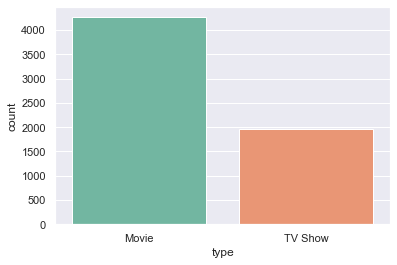

In [5]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")
plt.show()

After that let us create a heatmap of when these movies and tv shows were added to the Netflix database:

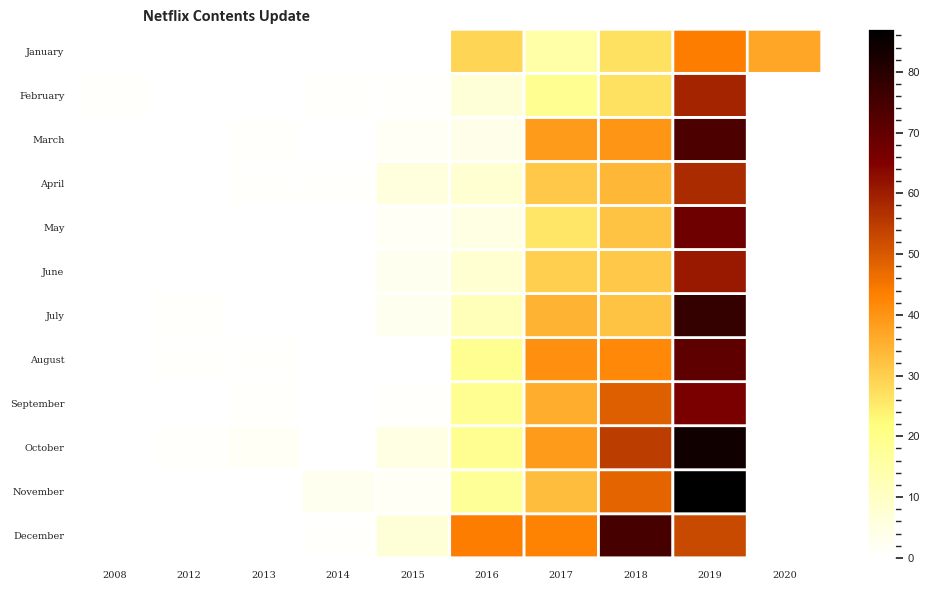

In [6]:
# use dataframe[['']] to get one column dataframe;
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(12, 7), dpi=100)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

#### What type of movie/tv show ratings exist in the database:

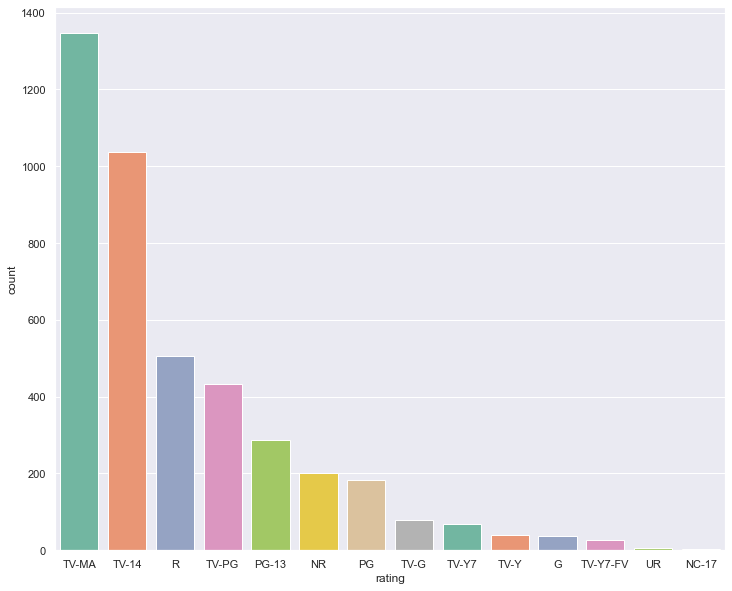

In [7]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
# print(netflix_movies['rating'].value_counts().index[0:15])
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.show()

### Merging data sources

In many cases, you would like to extend the data source you have using common shared keys or data points. Imagine two data sources about countries and you would like to get information from all of them. 

In [8]:
imdb_ratings=pd.read_csv('./data/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('./data/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

FileNotFoundError: [Errno 2] File b'./data/IMDb ratings.csv' does not exist: b'./data/IMDb ratings.csv'

In [ ]:
ratings.head()

There are many ways to merge data sources, here is a view of different strategies:

<img width="500" height="500" src='https://miro.medium.com/max/1200/1*9eH1_7VbTZPZd9jBiGIyNA.png'>

Source: https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d

In [ ]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall, left_on='Title', right_on='title', how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [ ]:
netflix_overall.count()

In [ ]:
joint_data.count()

Let us try to find out the countries with the highest number of films in the Netflix datasource: 

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

In [ ]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [ ]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)
plt.show()

Another interesting question might be to look at how long is each movie in the datasource:

In [ ]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.show()

Using the power of wordclouds we can highlight visually which genres are most popular among movies? 

In [ ]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
names = list(g.keys())
values = list(g.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 7), sharey=True)
axs.bar(np.arange(len(names)), values)
axs.set_xticks(np.arange(len(names)))
axs.set_xticklabels(names, rotation = 90)
axs.set_title('Categorical Plotting')
plt.show()

In [ ]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')

durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [ ]:
t=['title','no_of_seasons']

top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')
plt.show()

We can ask what are the popular genres of the tv shows: 

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Filtered on the country, what are the oldest TV shows on Netflix?

In [ ]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [ ]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [ ]:
oldest_us_series['title']

and similarly the newest:

In [ ]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:20]

In [ ]:
newest_us_series['title']

So I hope that you got a basic understanding of the process of exploratory data analysis with this tutorial and it can prepare you for your real projects.